In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

file_one = "mouse_drug_data.csv"
file_two = "clinicaltrial_data.csv"

mousedrug_data = pd.read_csv(file_one)
clinicaltrial_data = pd.read_csv(file_two)

merged_data = pd.merge(mousedrug_data,clinicaltrial_data,how='outer',on='Mouse ID')

merged_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


# Tumor Response to Treatment

In [2]:
tumor_vol_data = merged_data.groupby(['Drug','Timepoint'])

tumor_mean = pd.DataFrame(tumor_vol_data['Tumor Volume (mm3)'].mean())

tm_reset_index = tumor_mean.reset_index()
tm_reset_index.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
std_error = pd.DataFrame(tumor_vol_data['Tumor Volume (mm3)'].sem())

st_error = std_error.reset_index()
st_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
pivot_err_data = std_error.pivot_table('Tumor Volume (mm3)', index = 'Timepoint', columns = 'Drug')
pivot_mean_data = tumor_mean.pivot_table('Tumor Volume (mm3)', index = 'Timepoint', columns = 'Drug')

pivot_mean_data.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


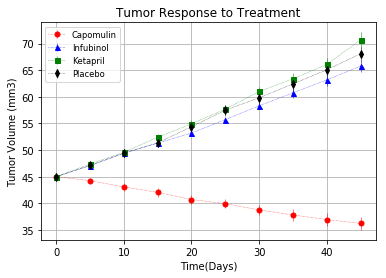

In [5]:
fig, ax = plt.subplots()

ax.grid()
ax.errorbar(pivot_mean_data.index,pivot_mean_data['Capomulin'],pivot_err_data['Capomulin'],marker = 'o',color = 'Red', ms = 5 , lw = 0.5 ,ls = 'dotted', label='Capomulin',alpha=2)
ax.errorbar(pivot_mean_data.index,pivot_mean_data['Infubinol'],pivot_err_data['Infubinol'],marker = '^',color = 'Blue', ms = 5, lw = 0.5,ls = 'dotted', label='Infubinol',alpha=2)
ax.errorbar(pivot_mean_data.index,pivot_mean_data['Ketapril'],pivot_err_data['Ketapril'],marker = 's',color = 'Green', ms = 5, lw = 0.5,ls = 'dotted', label='Ketapril',alpha=2)
ax.errorbar(pivot_mean_data.index,pivot_mean_data['Placebo'],pivot_err_data['Placebo'],marker = 'd',color = 'Black', ms = 5, lw = 0.5,ls = 'dotted', label='Placebo',alpha=2)
ax.set_xlabel('Time(Days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Tumor Response to Treatment')
plt.legend(loc='best',fontsize='small',fancybox=True)

fig.savefig("Images/TumorResponse.png")
plt.show()


# Metastatic Response to Treatment

In [6]:
meta_mean = pd.DataFrame(tumor_vol_data['Metastatic Sites'].mean())
meta_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
std_err_meta = pd.DataFrame(tumor_vol_data['Metastatic Sites'].sem())
std_err_meta.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
pivot_meta_err = std_err_meta.pivot_table('Metastatic Sites', index = 'Timepoint', columns = 'Drug')
pivot_meta_mean = meta_mean.pivot_table('Metastatic Sites', index = 'Timepoint', columns = 'Drug')
pivot_meta_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


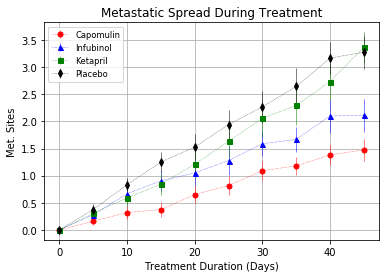

In [9]:
fig, ax = plt.subplots()

ax.grid()
ax.errorbar(pivot_meta_mean.index,pivot_meta_mean['Capomulin'],pivot_meta_err['Capomulin'],marker = 'o',color = 'Red', ms = 5 , lw = 0.5 ,ls = 'dotted', label='Capomulin',alpha=2)
ax.errorbar(pivot_meta_mean.index,pivot_meta_mean['Infubinol'],pivot_meta_err['Infubinol'],marker = '^',color = 'Blue', ms = 5, lw = 0.5,ls = 'dotted', label='Infubinol',alpha=2)
ax.errorbar(pivot_meta_mean.index,pivot_meta_mean['Ketapril'],pivot_meta_err['Ketapril'],marker = 's',color = 'Green', ms = 5, lw = 0.5,ls = 'dotted', label='Ketapril',alpha=2)
ax.errorbar(pivot_meta_mean.index,pivot_meta_mean['Placebo'],pivot_meta_err['Placebo'],marker = 'd',color = 'Black', ms = 5, lw = 0.5,ls = 'dotted', label='Placebo',alpha=2)
ax.set_xlabel('Treatment Duration (Days)')
ax.set_ylabel('Met. Sites')
ax.set_title('Metastatic Spread During Treatment')
plt.legend(loc='best',fontsize='small',fancybox=True)


fig.savefig("Images/Metastatic Spread.png")
plt.show()

# Survival Rates

In [10]:
mouse_count = pd.DataFrame(tumor_vol_data['Mouse ID'].count())
mouse_count.rename(columns = {'Mouse ID' : 'Mouse Count'}, inplace = True)
mouse_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [11]:
pivot_mouse_count = mouse_count.pivot_table('Mouse Count', index = 'Timepoint', columns = 'Drug')
pivot_mouse_count = pivot_mouse_count
pivot_mouse_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


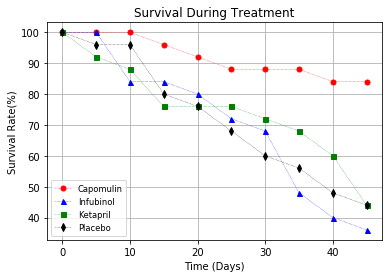

In [12]:
fig, ax = plt.subplots()

ax.grid()
ax.errorbar(pivot_mouse_count.index,pivot_mouse_count['Capomulin']*4,marker = 'o',color = 'Red', ms = 5 , lw = 0.5 ,ls = 'dotted', label='Capomulin',alpha=2)
ax.errorbar(pivot_mouse_count.index,pivot_mouse_count['Infubinol']*4,marker = '^',color = 'Blue', ms = 5, lw = 0.5,ls = 'dotted', label='Infubinol',alpha=2)
ax.errorbar(pivot_mouse_count.index,pivot_mouse_count['Ketapril']*4,marker = 's',color = 'Green', ms = 5, lw = 0.5,ls = 'dotted', label='Ketapril',alpha=2)
ax.errorbar(pivot_mouse_count.index,pivot_mouse_count['Placebo']*4, marker = 'd',color = 'Black', ms = 5, lw = 0.5,ls = 'dotted', label='Placebo',alpha=2)
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Survival Rate(%)')
ax.set_title('Survival During Treatment')
plt.legend(loc='best',fontsize='small',fancybox=True)


fig.savefig("Images/Survival.png")
plt.show()

In [13]:
perc_chng = (pivot_mean_data.iloc[-1,:] - pivot_mean_data.iloc[0,:])/pivot_mean_data.iloc[0,:]*100
perc_chng

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [14]:
only_relevant = perc_chng[['Capomulin','Infubinol','Ketapril','Placebo']]
#only_relevant = only_relevant.round().astype(int)
y_labels = ['{:2.0f}%'.format(i) for i in only_relevant]
y_labels



['-19%', '46%', '57%', '51%']

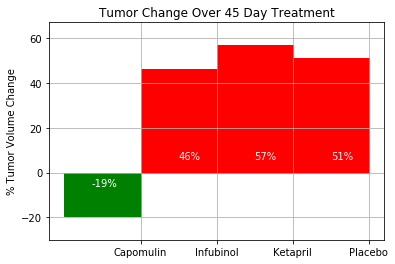

In [18]:
fig, ax = plt.subplots()
x_axis = only_relevant.index

bar_plt = plt.bar(x_axis, only_relevant, width = -1, align = 'edge')

for i, j in enumerate(only_relevant):
    text = bar_plt[i].get_x()
    if(j < 0):
        bar_plt[i].set_color('g')
        plt.text(text - 0.65, -6, y_labels[i], color='w')
    else:
        bar_plt[i].set_color('r')
        plt.text(text - 0.5, 6, y_labels[i], color='w')
        
plt.grid()
plt.yticks(np.arange(-20, max(only_relevant)+10,20))
plt.ylim(-30,max(only_relevant)+10)
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
fig.savefig("Images/Tumor Change over 45 days.png")
plt.show()
